In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Explanation of K-Means Clustering
K-Means is an unsupervised clustering algorithm that partitions data into `k` clusters. It works as follows:

1. Select `k` initial cluster centroids randomly.
2. Assign each data point to the nearest centroid.
3. Compute new centroids by averaging the assigned points.
4. Repeat steps 2 and 3 until centroids do not change significantly.

### Why K-Means for Iris Dataset?
- The dataset contains three distinct species, making it ideal for clustering.
- K-Means is efficient for well-separated clusters like those in the Iris dataset.


C:\Users\gouri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gouri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gouri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gouri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

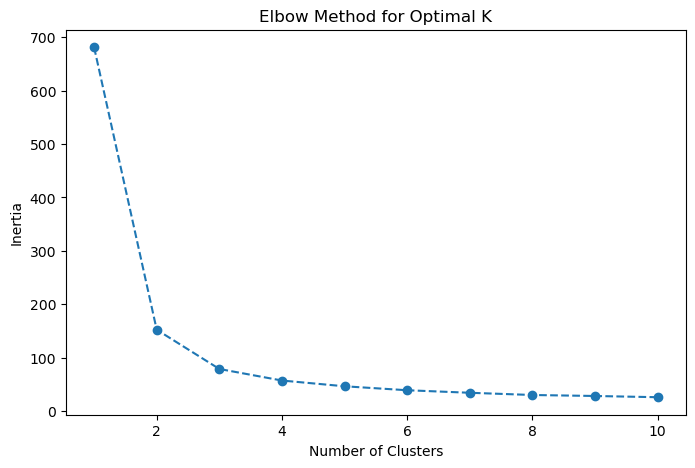

In [4]:
from sklearn.cluster import KMeans

# Use the Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\gouri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


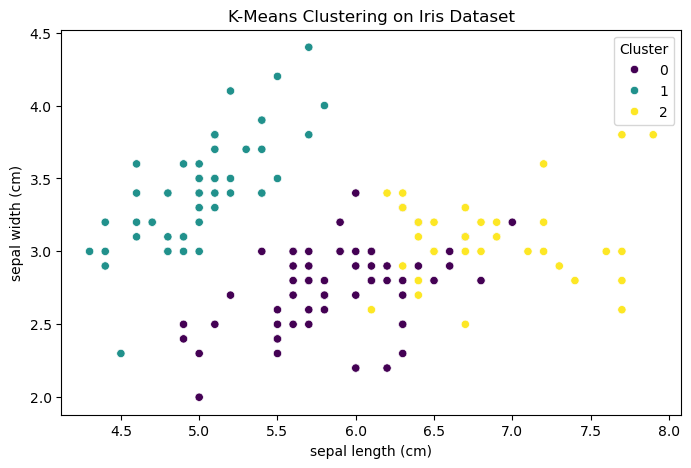

In [6]:
# Apply KMeans with the optimal number of clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

# Visualizing Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster_KMeans'], palette='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.legend(title='Cluster')
plt.show()


# Explanation of Hierarchical Clustering
Hierarchical Clustering builds a hierarchy of clusters using either a bottom-up (agglomerative) or top-down (divisive) approach.

1. Treat each data point as its own cluster.
2. Merge the closest clusters iteratively.
3. Continue until all points belong to a single cluster.
4. The dendrogram helps determine the optimal number of clusters.

### Why Hierarchical Clustering for Iris Dataset?
- Does not require predefining the number of clusters.
- Dendrograms help in understanding the clustering structure.

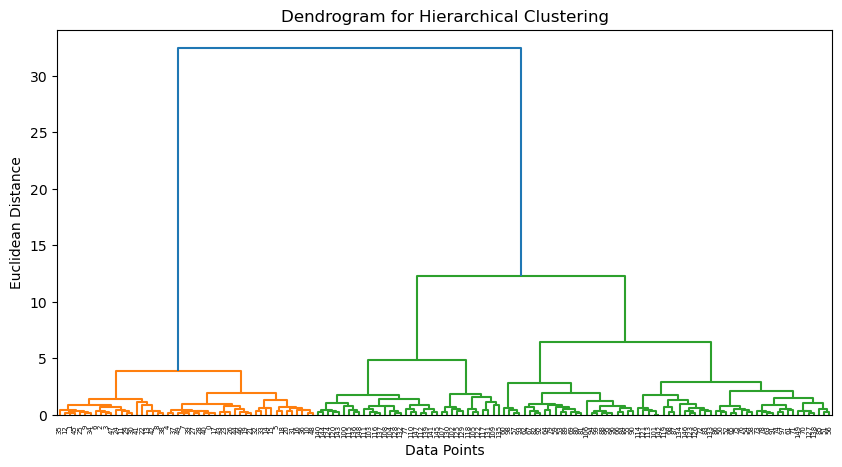

In [9]:
import scipy.cluster.hierarchy as sch

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, :-1], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

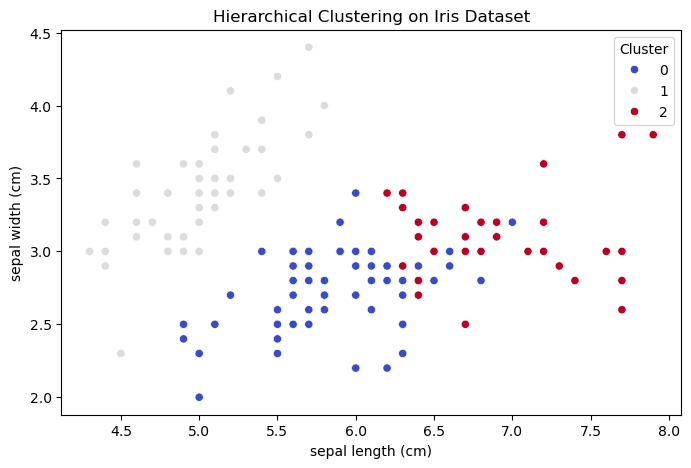

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = hc.fit_predict(df.iloc[:, :-1])

# Visualizing Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster_Hierarchical'], palette='coolwarm')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering on Iris Dataset')
plt.legend(title='Cluster')
plt.show()


# Conclusion
- **K-Means Clustering** effectively identified three clusters, confirming its efficiency on well-separated data.
- **Hierarchical Clustering** provided a visual hierarchy through the dendrogram, making it useful for exploratory analysis.
- Both methods gave similar results, reinforcing that the Iris dataset naturally clusters into three groups.